In [9]:
# %run featuregeneration.ipynb

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [33]:
print(X_train_reshaped.shape)
print(X_train.shape)
print(y_train.shape)
print(X_val_reshaped.shape)
print(y_val.shape)
print(X_test_reshaped.shape)
print(y_test.shape)

(26283, 408)
(26283, 24, 17)
(26283,)
(4354, 408)
(4354,)
(4355, 408)
(4355,)


# Bagging 

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the range of parameters to test
# n_estimators_options = [50, 100, 150]  # Number of base estimators to create
# max_features_options = [0.5, 0.7, 1.0] # Proportion of features to draw from the dataset
# max_samples_options = [0.5, 0.7, 1.0]  # Proportion of samples to draw from the dataset
n_estimators_options = [50]  # Number of base estimators to create
max_features_options = [1.0] # Proportion of features to draw from the dataset
max_samples_options = [1.0]  # Proportion of samples to draw from the dataset

# Variables to store the best combination and the lowest error
best_n_estimators = None
best_max_features = None
best_max_samples = None
best_mse = float("inf")

# Loop over all combinations of parameters
for n_estimators in n_estimators_options:
    for max_features in max_features_options:
        for max_samples in max_samples_options:
            # Initialize the model with the current combination of parameters
            bagging_model = BaggingRegressor(
                estimator=DecisionTreeRegressor(),
                n_estimators=n_estimators,
                max_features=max_features,
                max_samples=max_samples,
                random_state=101
            )
            
            # Fit the model on the training set
            bagging_model.fit(X_train_reshaped, y_train)
            
            # Predict on the validation set
            y_val_pred = bagging_model.predict(X_val_reshaped)
            
            # Calculate the mean squared error for validation
            mse = mean_squared_error(y_val, y_val_pred)
            
            # Update the best parameters if current mse is lower
            if mse < best_mse:
                best_mse = mse
                best_n_estimators = n_estimators
                best_max_features = max_features
                best_max_samples = max_samples

# Output the best combination and the corresponding MSE
print(f"Best Parameters:")
print(f"n_estimators: {best_n_estimators}")
print(f"max_features: {best_max_features}")
print(f"max_samples: {best_max_samples}")
print(f"Mean Squared Error: {best_mse:.4f}")

print("----------------------------------------")
# Predict on the test set with the best model found
y_test_pred = bagging_model.predict(X_test_reshaped)

# Evaluate the model performance on the test set
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"R² Score: {r2:.4f}")


Best Parameters:
n_estimators: 50
max_features: 1.0
max_samples: 1.0
Mean Squared Error: 0.0007
Mean Absolute Error (MAE): 0.01553377574624462
Mean Squared Error (MSE): 0.00043471985012132145
R² Score: 0.9233


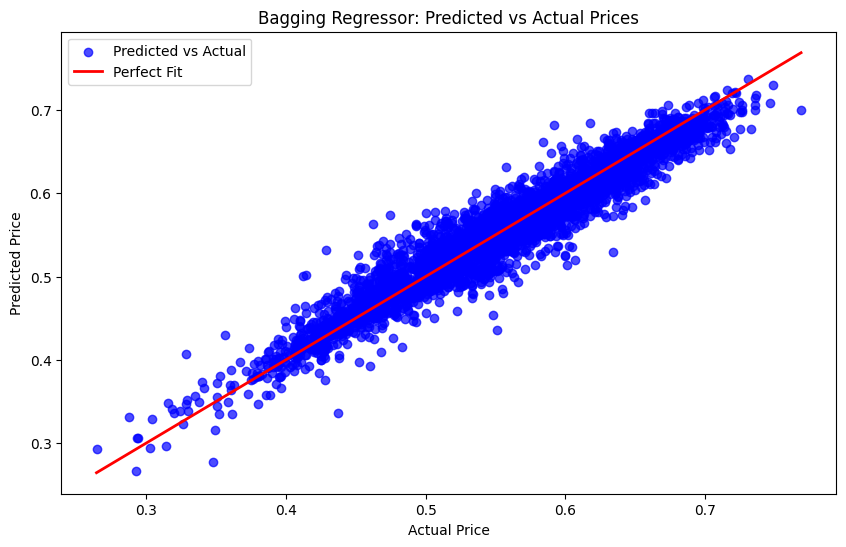

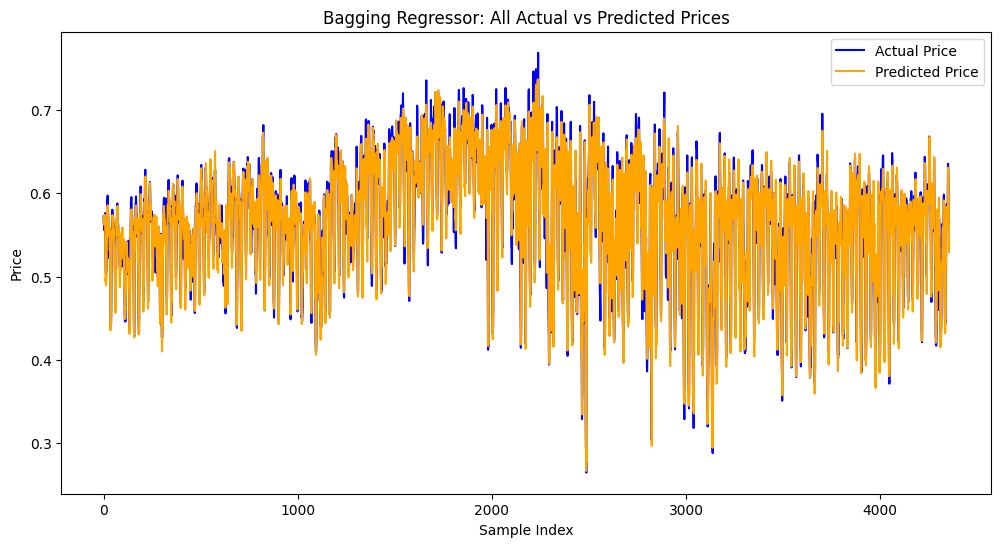

In [14]:
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred contain all actual and predicted prices for the test set

# Scatter Plot of Prediction vs Actual Price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predicted vs Actual", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Bagging Regressor: Predicted vs Actual Prices")
plt.legend()
plt.show()

# Line Plot of All Actual vs Predicted Prices without markers
plt.figure(figsize=(12, 6))
plt.plot(y_test, linestyle='-', label="Actual Price", color="blue")
plt.plot(y_test_pred, linestyle='-', label="Predicted Price", color="orange")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Bagging Regressor: All Actual vs Predicted Prices")
plt.legend()
plt.show()



# Bagging w/ DecisionTreeRegressor

In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Parameters for the Bagging Regressor
n_estimators = 100  # Number of base estimators
max_features = 1.0  # Fraction of features to use
max_samples = 0.9   # Fraction of samples to use

# Initialize the Bagging Regressor with the specified parameters
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=n_estimators,
    max_features=max_features,
    max_samples=max_samples,
    random_state=101
)

# Fit the model on the reshaped training data
bagging_model.fit(X_train_reshaped, y_train)

# Predict on the reshaped validation set
y_val_pred = bagging_model.predict(X_val_reshaped)

# Predict on the reshaped test set
y_test_pred = bagging_model.predict(X_test_reshaped)

# Evaluate the model performance on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)  # Calculate RMSE
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model performance on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)  # Calculate RMSE
test_r2 = r2_score(y_test, y_test_pred)

# Output the evaluation metrics for validation and test sets
print("Validation Set Performance:")
print("Mean Absolute Error (MAE):", val_mae)
print("Mean Squared Error (MSE):", val_mse)
print("Root Mean Squared Error (RMSE):", val_rmse)
print(f"R² Score: {val_r2:.4f}")

print("\nTest Set Performance:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print(f"R² Score: {test_r2:.4f}")

# Validation Set Performance:
# Mean Absolute Error (MAE): 0.020269147335302346
# Mean Squared Error (MSE): 0.0008271876954585724
# Root Mean Squared Error (RMSE): 0.028760870909250513
# R² Score: 0.9332

# Test Set Performance:
# Mean Absolute Error (MAE): 0.017404427284168803
# Mean Squared Error (MSE): 0.0005267979334362258
# Root Mean Squared Error (RMSE): 0.02295207906565821
# R² Score: 0.9070


Validation Set Performance:
Mean Absolute Error (MAE): 0.017959919934071394
Mean Squared Error (MSE): 0.0006612502202812303
Root Mean Squared Error (RMSE): 0.025714786024410748
R² Score: 0.9466

Test Set Performance:
Mean Absolute Error (MAE): 0.015451824913197678
Mean Squared Error (MSE): 0.0004332365789985047
Root Mean Squared Error (RMSE): 0.020814335900972307
R² Score: 0.9235


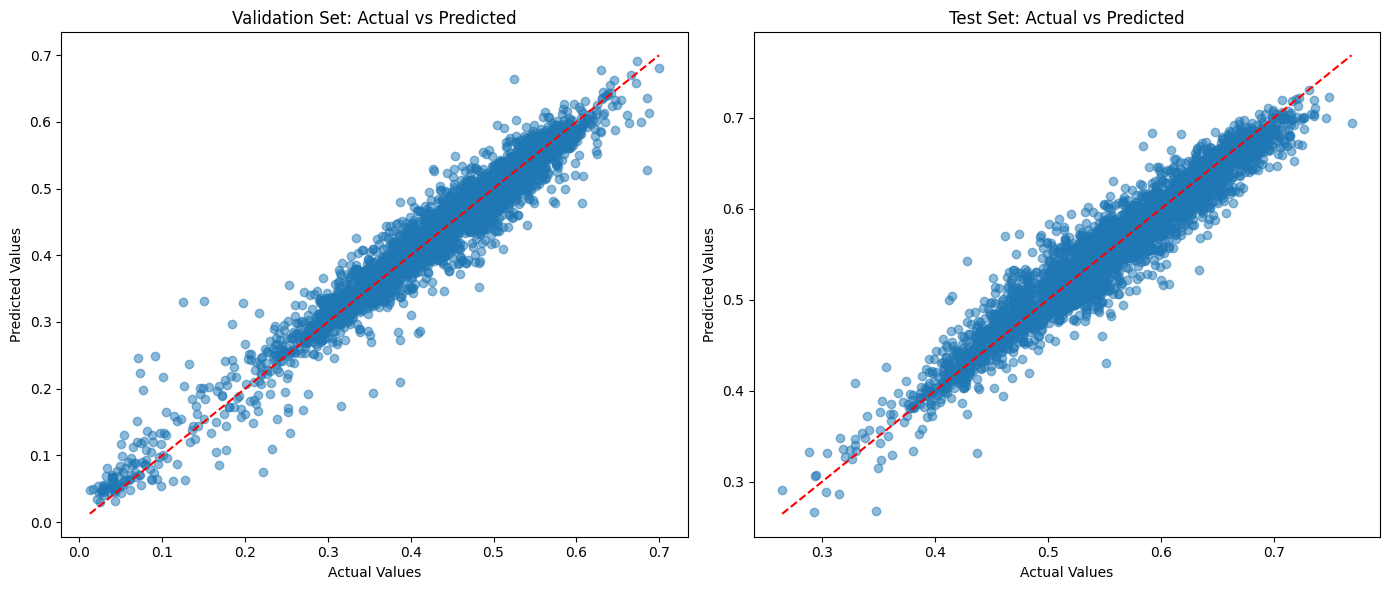

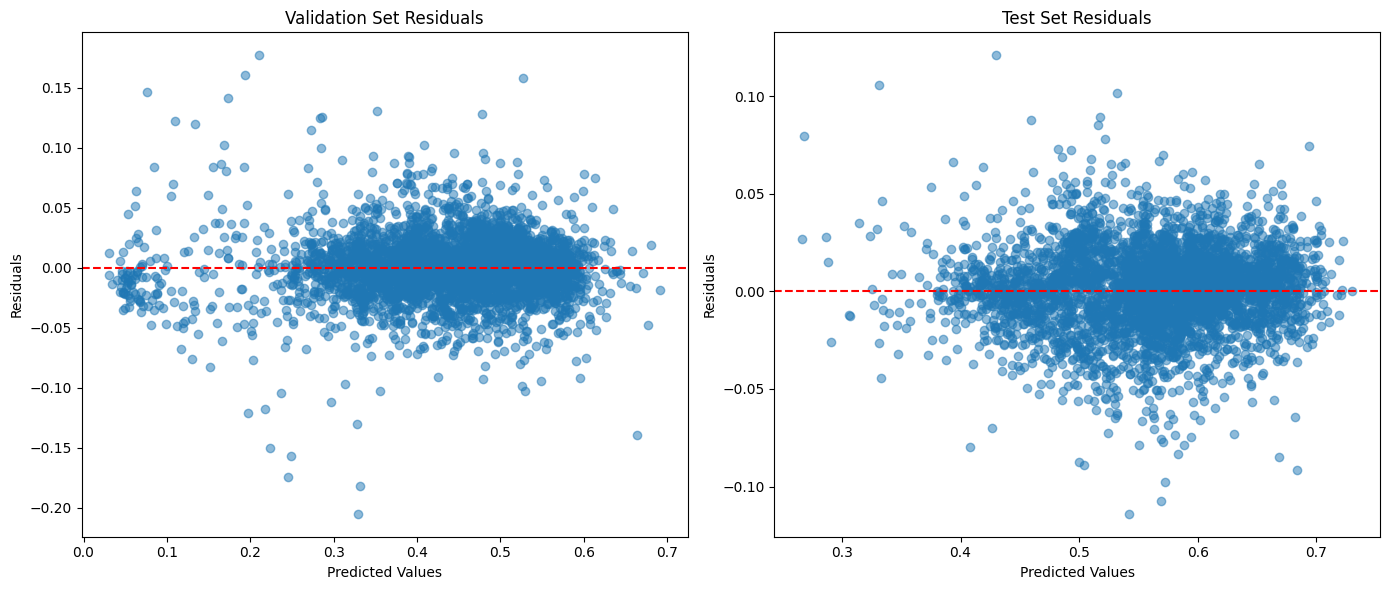

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# === Plot 1: Actual vs. Predicted Values for Validation and Test Sets ===
plt.figure(figsize=(14, 6))

# Subplot for Validation Set
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Validation Set: Actual vs Predicted")

# Subplot for Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()

# === Plot 2: Residuals for Validation and Test Sets ===
# Calculate residuals for validation and test sets
val_residuals = y_val - y_val_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(14, 6))

# Subplot for Validation Set Residuals
plt.subplot(1, 2, 1)
plt.scatter(y_val_pred, val_residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Validation Set Residuals")

# Subplot for Test Set Residuals
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Test Set Residuals")

plt.tight_layout()
plt.show()


# Ada Boost


In [16]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the AdaBoost Regressor with a Decision Tree as the base estimator
ada_boost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),  # Use shallow trees as weak learners
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate controls contribution of each estimator
    random_state=101
)

# Train the AdaBoost model on the reshaped training data
ada_boost_model.fit(X_train_reshaped, y_train)

# Make predictions on the reshaped test set
y_pred = ada_boost_model.predict(X_test_reshaped)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.01858123783269145
Mean Squared Error (MSE): 0.0006160392104394352
Root Mean Squared Error (RMSE): 0.024820137196225067
R² Score: 0.8913


# XG Boost

In [27]:
import xgboost as xgb  # Import the XGBoost module
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Configure key parameters
n_estimators = 1000
learning_rate = 0.1
max_depth = 6

# Initialize the regressor (renaming it to xgb_model to avoid conflict)
xgb_model = xgb.XGBRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    random_state=42,
    early_stopping_rounds=50
)

# Train with early stopping
xgb_model.fit(
    X_train_reshaped, y_train,
    eval_set=[(X_train_reshaped, y_train), (X_val_reshaped, y_val)],
    verbose=False
)

# Check if early stopping was triggered
results = xgb_model.evals_result()
actual_rounds = len(results['validation_0']['rmse'])
if actual_rounds < n_estimators:
    print(f"\n=== Early Stopping ===")
    print(f"Training stopped at {actual_rounds} rounds")
    print(f"Best iteration was at {xgb_model.best_iteration}")
else:
    print("\nTraining completed all {n_estimators} rounds")

# Make predictions
predictions = xgb_model.predict(X_test_reshaped)

# Calculate metrics
metrics = {
    'Mean Absolute Error': mean_absolute_error(y_test, predictions),
    'Mean Square Error': mean_squared_error(y_test, predictions),
    'Root Mean Square Error': np.sqrt(mean_squared_error(y_test, predictions)),
    'R²': r2_score(y_test, predictions)
}

print("\n=== Model Configuration ===")
print(f"n_estimators: {n_estimators}")
print(f"learning_rate: {learning_rate}")
print(f"max_depth: {max_depth}")

print("\n=== Evaluation Metrics ===")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")

# Plot training curves
results = xgb_model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']


=== Early Stopping ===
Training stopped at 151 rounds
Best iteration was at 100

=== Model Configuration ===
n_estimators: 1000
learning_rate: 0.1
max_depth: 6

=== Evaluation Metrics ===
Mean Absolute Error: 0.0150
Mean Square Error: 0.0004
Root Mean Square Error: 0.0201
R²: 0.9288


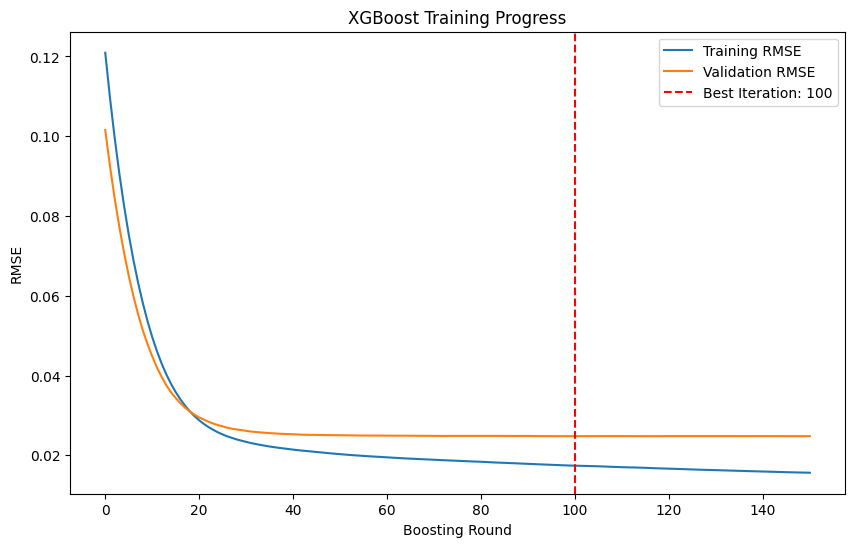

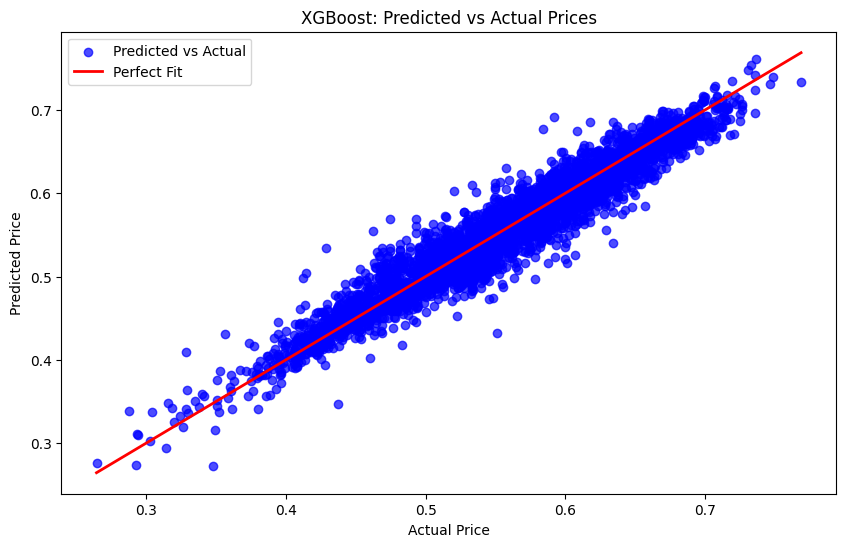

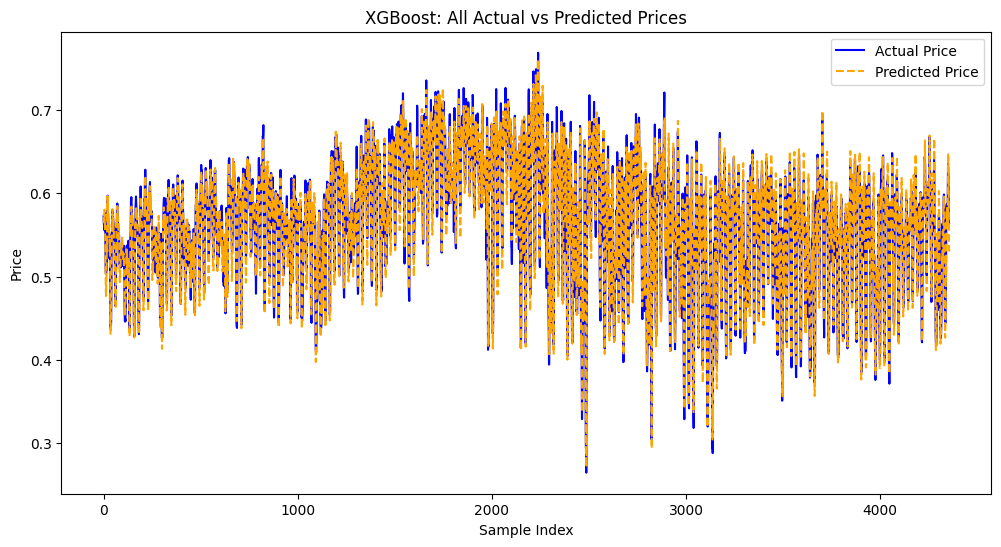

In [28]:
# 1. Plotting the RMSE over boosting rounds
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.axvline(x=xgb_model.best_iteration, color='red', linestyle='--', label=f'Best Iteration: {xgb_model.best_iteration}')
plt.legend()
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training Progress')
plt.show()

# 2. Scatter plot for Prediction vs Actual Price
predictions = xgb_model.predict(X_test_reshaped)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Predicted vs Actual Prices")
plt.legend()
plt.show()

# 3. Line plot for All Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, linestyle='-', label="Actual Price", color="blue")
plt.plot(predictions, linestyle='--', label="Predicted Price", color="orange")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("XGBoost: All Actual vs Predicted Prices")
plt.legend()
plt.show()


Fitting 3 folds for each of 27 candidates, totalling 81 fits


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Early stopping was triggered. Best iteration: 345

=== Evaluation Metrics ===
Mean Absolute Error: 0.0153
Mean Square Error: 0.0004
Root Mean Square Error: 0.0205
R²: 0.9261


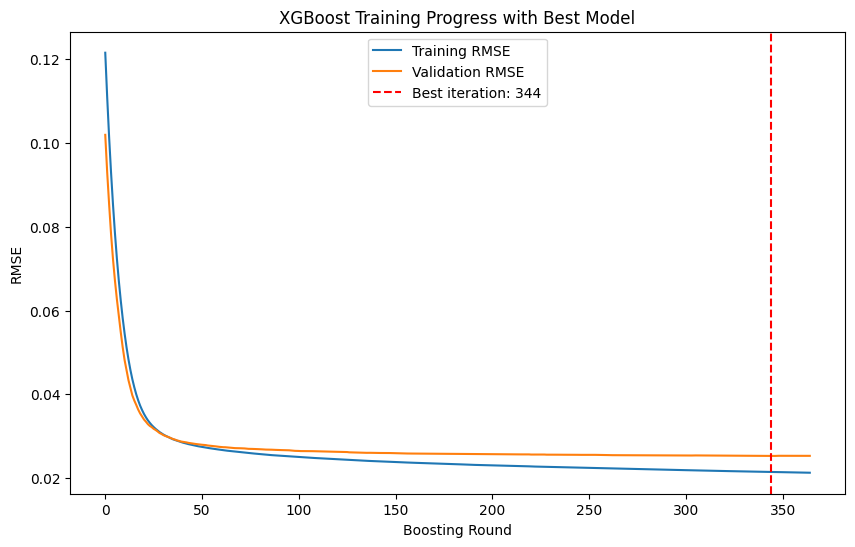

In [32]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
}

# Initialize the regressor
xgb_model = xgb.XGBRegressor(
    random_state=42,
    early_stopping_rounds=20
)

# Define GridSearchCV with the parameter grid and cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(
    X_train_reshaped, y_train,
    eval_set=[(X_train_reshaped, y_train), (X_val_reshaped, y_val)],  # Validation set for early stopping
    verbose=False
)

# Retrieve the best model and parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

n_estimators = best_params['n_estimators']
best_iteration = best_xgb_model.best_iteration + 1  # Adjust for zero-based index

if best_iteration < n_estimators:
    print(f"Early stopping was triggered. Best iteration: {best_iteration}")
else:
    print("Early stopping was not triggered.")

# Make predictions with the best model on the test set
predictions = best_xgb_model.predict(X_test_reshaped)

# Calculate evaluation metrics on the test set
metrics = {
    'Mean Absolute Error': mean_absolute_error(y_test, predictions),
    'Mean Square Error': mean_squared_error(y_test, predictions),
    'Root Mean Square Error': np.sqrt(mean_squared_error(y_test, predictions)),
    'R²': r2_score(y_test, predictions)
}

print("\n=== Evaluation Metrics ===")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")

# Plot training curves for the best model
results = best_xgb_model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.axvline(x=best_xgb_model.best_iteration, color='r', linestyle='--', 
            label=f'Best iteration: {best_xgb_model.best_iteration}')
plt.legend()
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training Progress with Best Model')
plt.show()


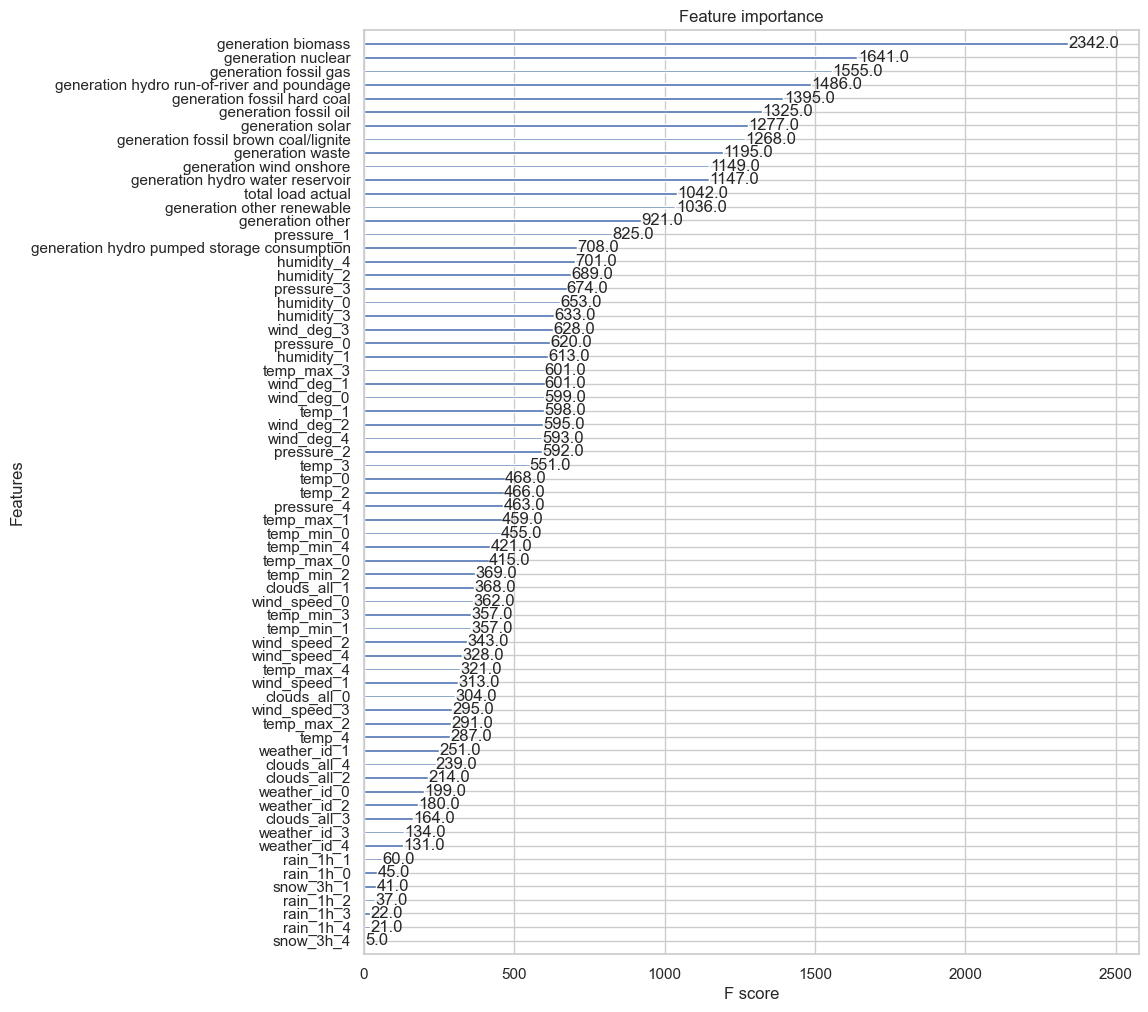

In [ ]:
# Plot feature importance using the trained model from cell 16
fig, ax = plt.subplots(figsize=(10, 12))  # Adjust the width and height as needed
xgb.plot_importance(bst, ax=ax)
plt.show()

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
}

# Initialize the regressor
xgb_model = xgb.XGBRegressor(
    random_state=42,
    early_stopping_rounds=20
)

# Define GridSearchCV with the parameter grid and cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(
    X_train_reshaped, y_train,
    eval_set=[(X_train_reshaped, y_train), (X_val_reshaped, y_val)],  # Validation set for early stopping
    verbose=False
)

# Retrieve the best model and parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Adjust for zero-based index in best iteration
n_estimators = best_params['n_estimators']
best_iteration = best_xgb_model.best_iteration + 1

if best_iteration < n_estimators:
    print(f"Early stopping was triggered. Best iteration: {best_iteration}")
else:
    print("Early stopping was not triggered.")

# Make predictions with the best model on the test set
test_predictions = best_xgb_model.predict(X_test_reshaped)
val_predictions = best_xgb_model.predict(X_val_reshaped)  # Predictions on validation set

# Calculate evaluation metrics on the test set
test_metrics = {
    'Mean Absolute Error': mean_absolute_error(y_test, test_predictions),
    'Mean Square Error': mean_squared_error(y_test, test_predictions),
    'Root Mean Square Error': np.sqrt(mean_squared_error(y_test, test_predictions)),
    'R²': r2_score(y_test, test_predictions)
}

print("\n=== Test Set Evaluation Metrics ===")
for metric_name, value in test_metrics.items():
    print(f"{metric_name}: {value:.4f}")

# === Calculate and print validation metrics ===
val_metrics = {
    'Mean Absolute Error': mean_absolute_error(y_val, val_predictions),
    'Mean Square Error': mean_squared_error(y_val, val_predictions),
    'Root Mean Square Error': np.sqrt(mean_squared_error(y_val, val_predictions)),
    'R²': r2_score(y_val, val_predictions)
}

print("\n=== Validation Set Evaluation Metrics ===")
for metric_name, value in val_metrics.items():
    print(f"{metric_name}: {value:.4f}")

# === Plot training curves for the best model ===
# Retrieve training and validation RMSE for each boosting round
results = best_xgb_model.evals_result()
train_rmse = results['validation_0']['rmse']  # Training set RMSE
val_rmse = results['validation_1']['rmse']    # Validation set RMSE

plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.axvline(x=best_xgb_model.best_iteration, color='r', linestyle='--', 
            label=f'Best iteration: {best_xgb_model.best_iteration}')
plt.legend()
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training Progress with Best Model')
plt.show()



=== Validation Set Evaluation Metrics ===
Mean Absolute Error: 0.0180
Mean Square Error: 0.0006
Root Mean Square Error: 0.0253
R²: 0.9485


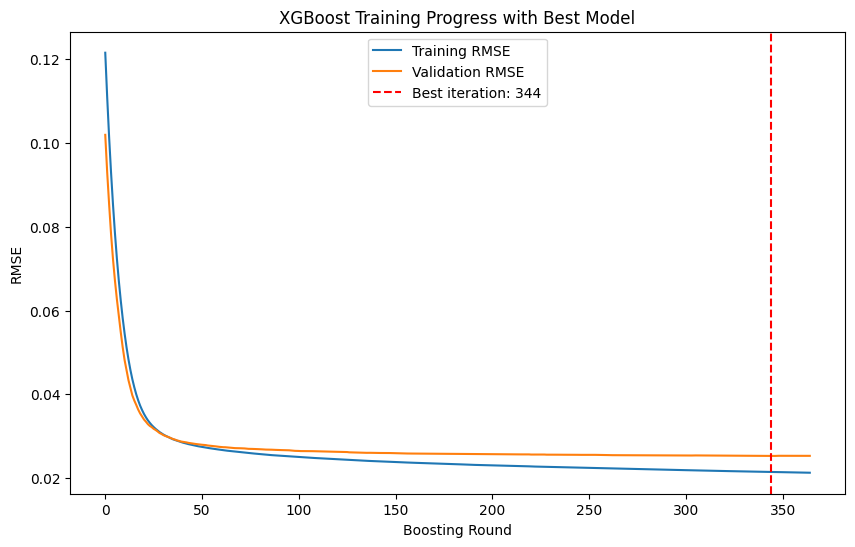

In [37]:
val_predictions = best_xgb_model.predict(X_val_reshaped)  # Predictions on validation set

val_metrics = {
    'Mean Absolute Error': mean_absolute_error(y_val, val_predictions),
    'Mean Square Error': mean_squared_error(y_val, val_predictions),
    'Root Mean Square Error': np.sqrt(mean_squared_error(y_val, val_predictions)),
    'R²': r2_score(y_val, val_predictions)
}


print("\n=== Validation Set Evaluation Metrics ===")
for metric_name, value in val_metrics.items():
    print(f"{metric_name}: {value:.4f}")

# === Plot training curves for the best model ===
# Retrieve training and validation RMSE for each boosting round
results = best_xgb_model.evals_result()
train_rmse = results['validation_0']['rmse']  # Training set RMSE
val_rmse = results['validation_1']['rmse']    # Validation set RMSE

plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.axvline(x=best_xgb_model.best_iteration, color='r', linestyle='--', 
            label=f'Best iteration: {best_xgb_model.best_iteration}')
plt.legend()
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training Progress with Best Model')
plt.show()